# **Wine Dataset Analysis using K-means and PCA**

<img src="delicious-red-wine-royalty-free-image-1585590768.jpg" width="500" height="100">

### Description:
**The dataset comprises 178 samples with 13 numerical attributes (all chemical concentrations,
such as Alcohol, Malic Acid, Ash, alkalinity of ash, Magnesium, etc.), and a class label that
can take on one of three possible values (1, 2, or 3), each corresponding to a wine cultivar.
.**

### Objectives:
**The goal is to build a model that can correctly classify a wine sample based
on the aforementioned chemical attributes. Given a new wine sample's chemical analysis, we want the
model to predict which cultivar the wine belongs to.**

# DATA PREPARATION


In [3]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
#loading the dataset
wine=load_wine()

#Convert to pandas dataframe
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

#Check data with info function
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe


## DATA EXPLORATION

In [5]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### 2.1 Is the Target Balanced or imbalanced?

In [6]:
np.bincount(data["target"])

array([59, 71, 48], dtype=int64)

In [7]:
#check the percentage representation of the classes
data.target.value_counts(normalize=True).round(3)

1.0    0.399
0.0    0.331
2.0    0.270
Name: target, dtype: float64

The prevailing class is 1 but,on the appearance, there are no problematic imbalances( If the classes were unbalanced we could have used the resampling module from Scikit-Learn in order to up-sample minority class and/or down-sample majority class)

### 2.2 Checking missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

Text(0.5, 1.0, 'Graphical Representation Of Null Occurances')

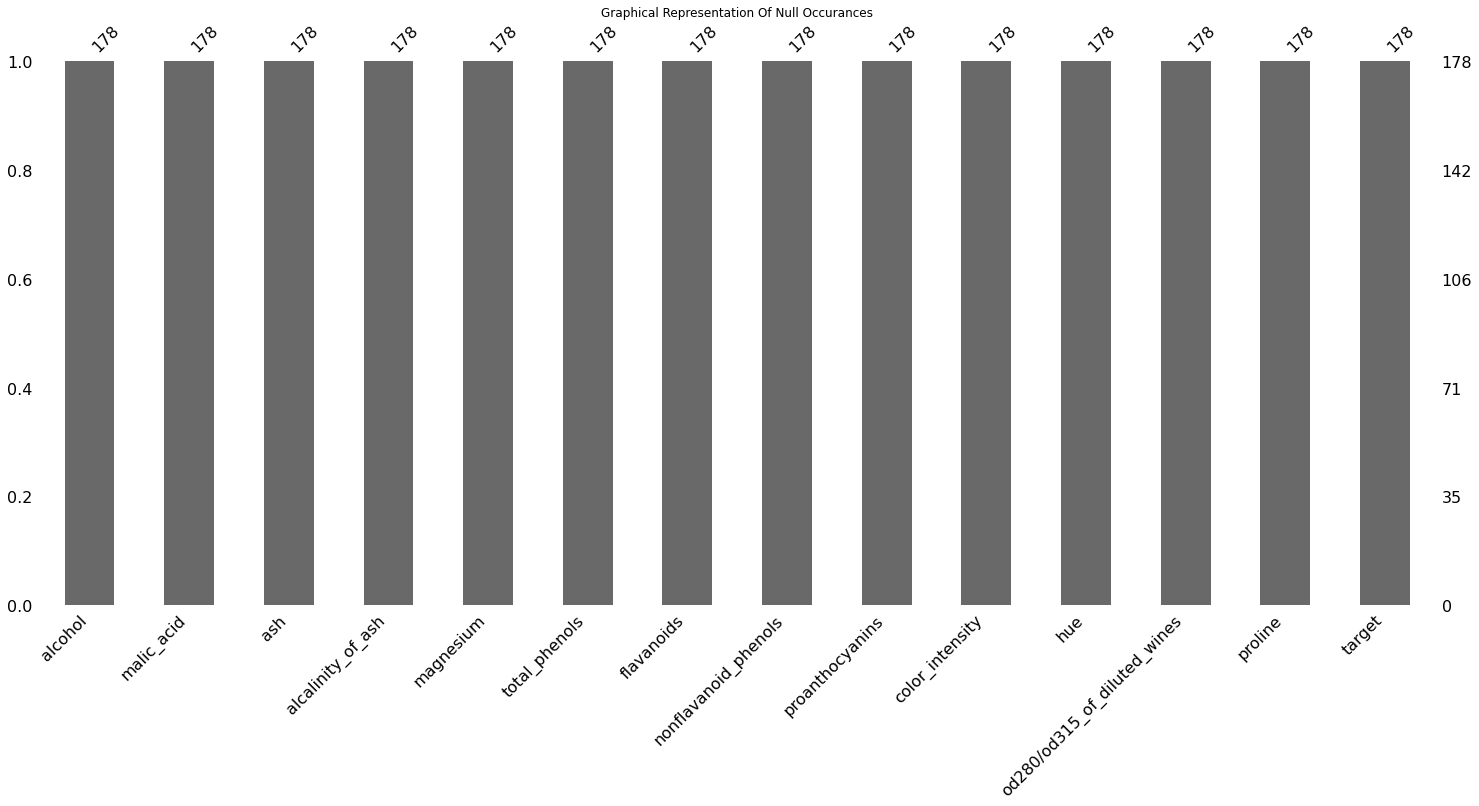

In [22]:
data.info()
import missingno as msno
msno.bar(data)
plt.title('Graphical Representation Of Null Occurances')

### Checking The Dstribution of All Columns

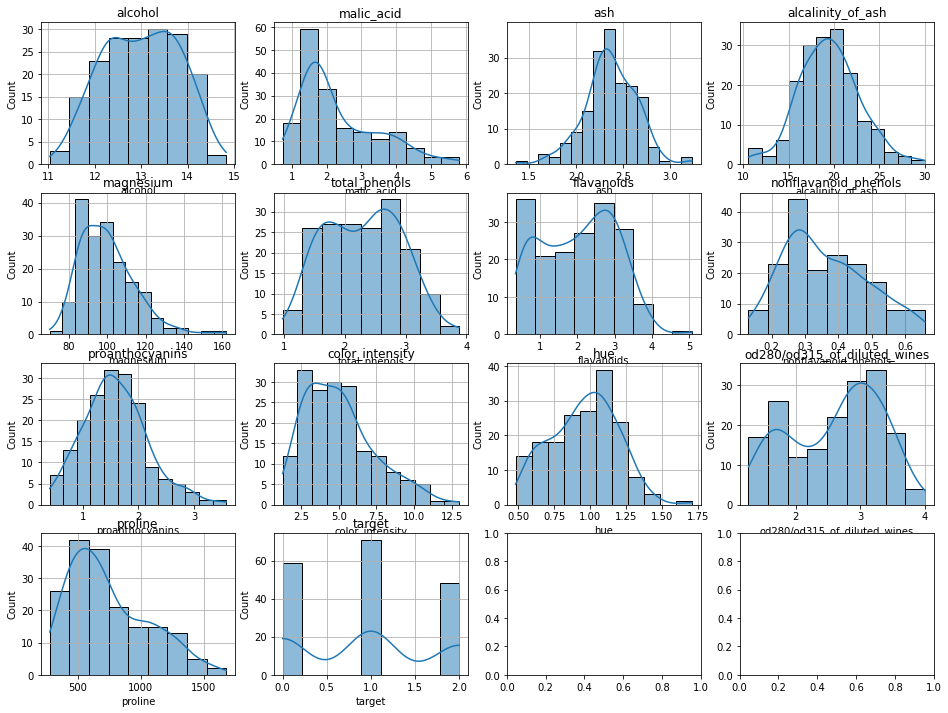

In [20]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
axs = axs.flatten()

# Iterate over each numerical column and plot its distribution
for i, column in enumerate(data.columns):
    ax = axs[i]
    #ax.hist(df[column], bins='auto')
    sns.histplot(data[column], kde=True, ax=ax)
    ax.set_title(column)
    ax.grid(True)

### 2.3 Feature correlation: Is feature selection or reduction necessary?

Text(0.5, 1.0, 'Correlation Heatmap')

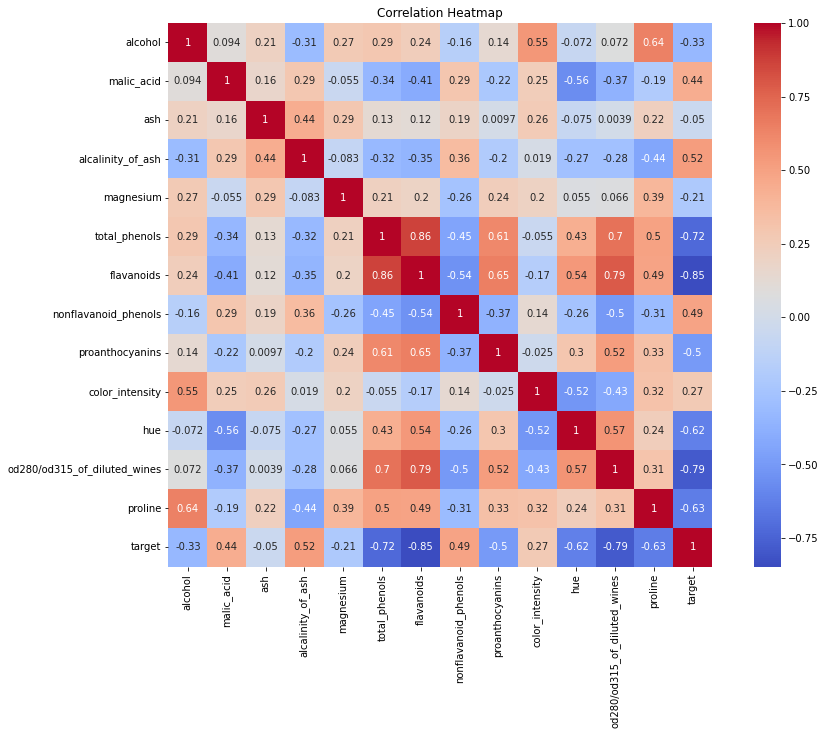

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')

Some features have quite high multi-collinearity:

* flavanoids / total phenols 0.86
* flavanoids / od280/od315_of_diluted_wines 0.79

From this information, we can keep only flavanoids and drop the other two. However, dimensionality reduction handles column reduction in the subsequent cells. Thus this procedure is not entirely necessary


To have a better sense of the scope of the correlations let's pairplot

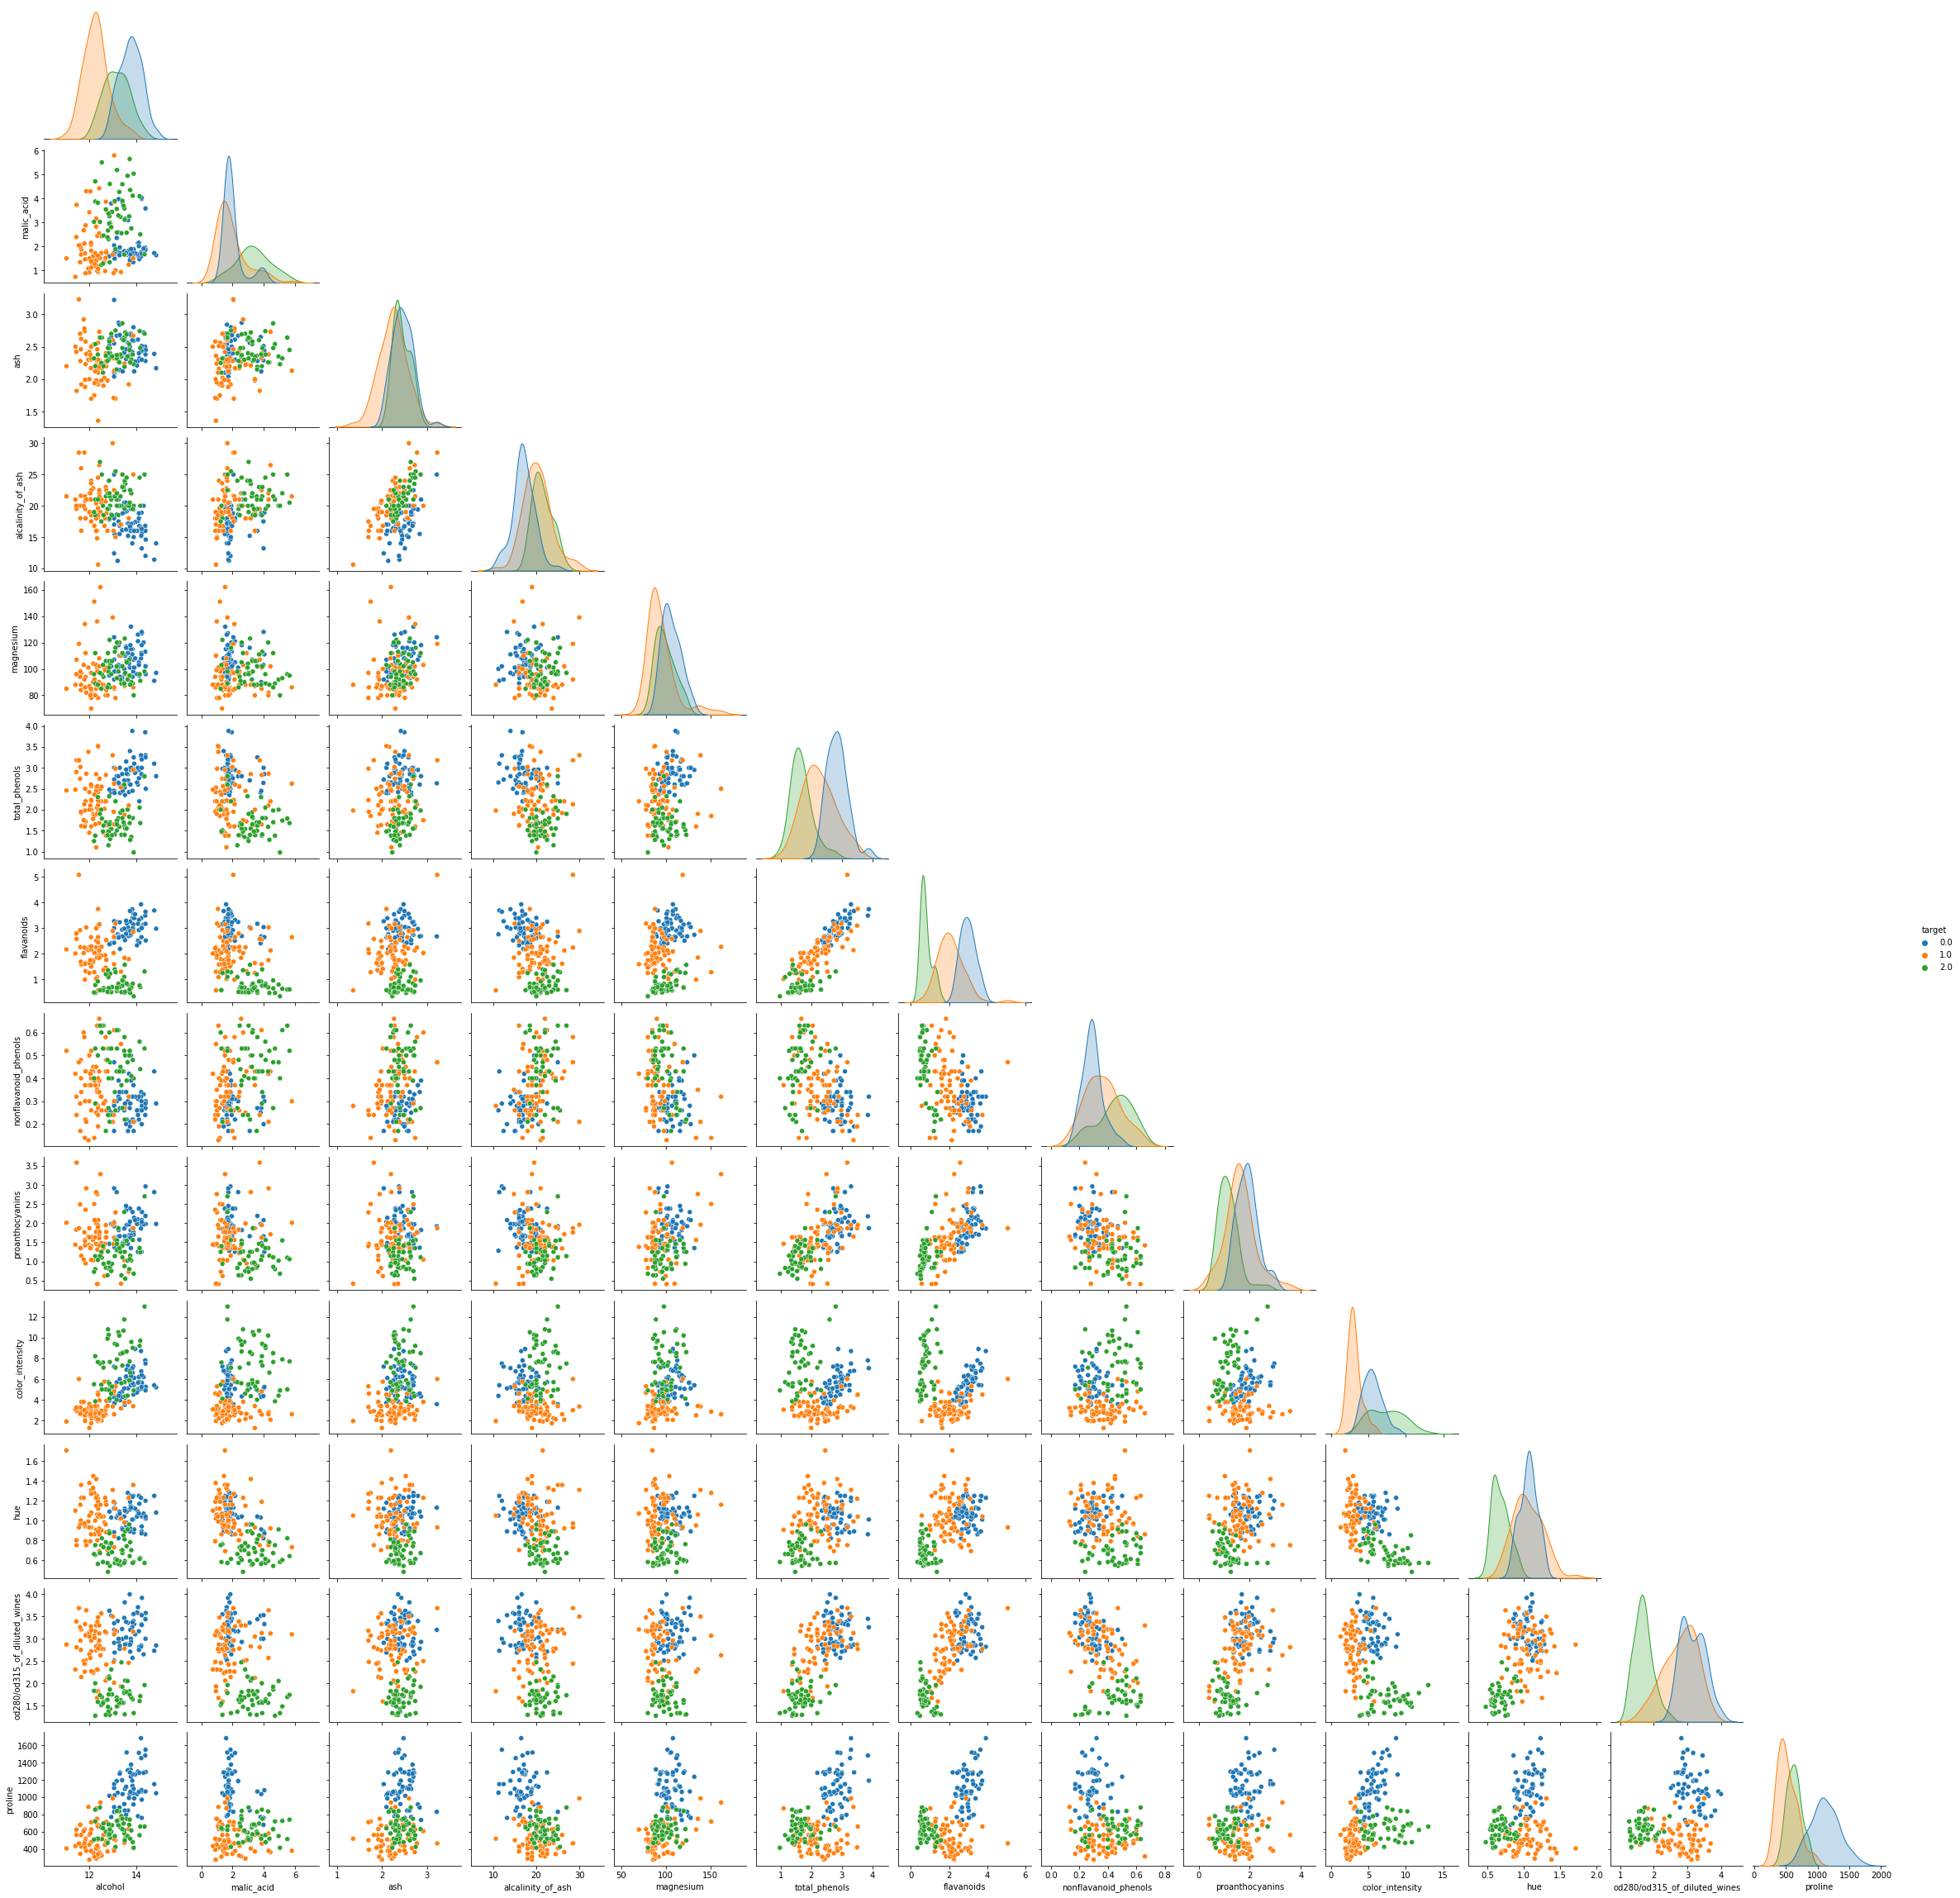

In [16]:
sns.pairplot(data, 
             hue='target', 
             palette="tab10", 
             corner=True)

plt.show()

It can be noted that some features already separate the classes quite well. 

For example, Proline seems to be a quite explicative variable itself, especially for wine 0 (blue dots). Also color intensity, coupled with total phenols or flavanoids separates the classes quite well.

## DATA PREPROCESSING

**Standardization**

In [13]:
#Standardize the data to have a mean of 0 and variance of 1
data = StandardScaler().fit_transform(data)

data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

**Principal Component Analysis**

In [24]:
#create a PCA instance
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)

In [25]:
#Create a dataframe for PCA
X = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [18]:
X.head()

,principal component 1,principal component 2
0,-3.522934,-1.453098
1,-2.528858,0.330019
2,-2.785029,-1.036936
3,-3.922588,-2.768210
4,-1.407511,-0.867773


## Apply K-means

In [26]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [20]:
#Adding the K-means clustering labels to our DataFrame.
X['labels'] = kmeans.labels_

In [21]:
X.tail()

,principal component 1,principal component 2,labels
173,3.627996,-2.206617,2
174,2.942729,-1.752263,2
175,3.027272,-2.756040,2
176,2.755222,-2.293784,2
177,3.496336,-2.760608,2


## VISUALISING CLUSTERS

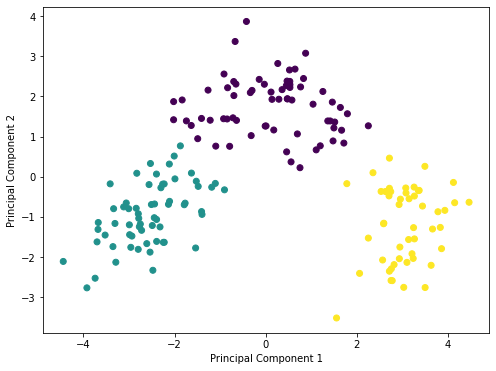

In [22]:
#creating a scatter plot of the two principal components  to the K-Means cluster assignments.

plt.figure(figsize=(8,6))
plt.scatter(X['principal component 1'], X['principal component 2'], c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



### Determining optimal number of clusters using the elbow method

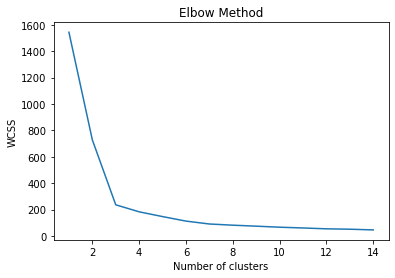

In [26]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Here we're using the elbow method to determine the optimal number of clusters.
# We run a loop to fit multiple k-means models and in each successive model,
# we increase the number of clusters. We record the sum of squared distances (WCSS) and plot it to observe 'The elbow'.

**Inertia decreases from 3 to 4 very slowly , so 3 was a good choice**

# Other Experiments

### Experimenting with 3 components

**The main aim here is to observe how an additional component influences the clustering algorithm in a 3D space**

In [49]:
pca = PCA(n_components=3)
scaled = StandardScaler().fit_transform(data)
principalComponents = pca.fit_transform(scaled)
X = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])

In [50]:
X

,principal component 1,principal component 2,principal component 3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


In [51]:
kmeans.fit(X)

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

Text(0.5, 1.0, 'PCA 1 vs PCA 2')

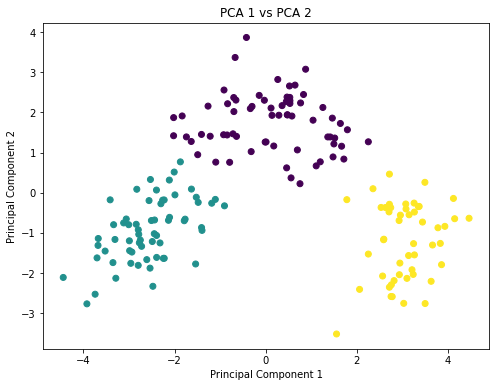

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(X['principal component 1'], X['principal component 2'], c=kmeans.labels_,cmap='viridis_r')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 1 vs PCA 2')

Text(0.5, 1.0, 'PCA 2 vs PCA 3')

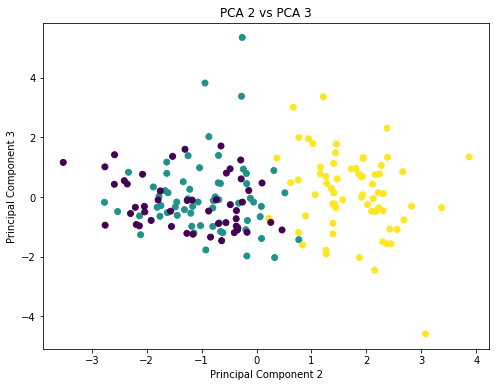

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(X['principal component 2'], X['principal component 3'], c=kmeans.labels_,cmap='viridis')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PCA 2 vs PCA 3')

Text(0.5, 1.0, 'PCA 2 vs PCA 3')

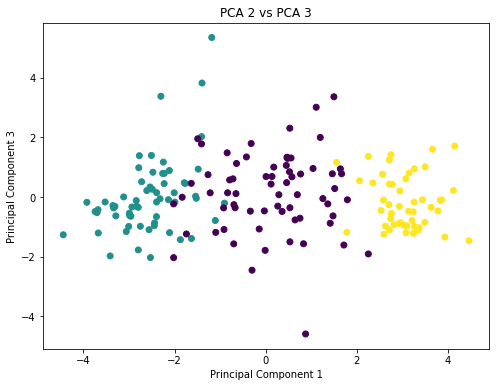

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(X['principal component 1'], X['principal component 3'], c=kmeans.labels_,cmap='viridis_r')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PCA 2 vs PCA 3')

## 3D Visualization of clusters

Text(0.5, 0, 'Principal Component 3')

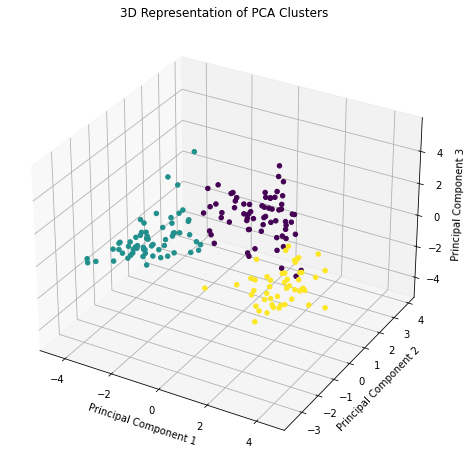

In [62]:
plt.figure(figsize = (10, 8))
plot_axes = plt.axes(projection = '3d')
plt.title('3D Representation of PCA Clusters')
plot_axes.scatter3D(X['principal component 1'],X['principal component 2'], X['principal component 3'],c=kmeans.labels_,depthshade=False,cmap='viridis_r')
plot_axes.set_xlabel('Principal Component 1')
plot_axes.set_ylabel('Principal Component 2')
plot_axes.set_zlabel('Principal Component 3')

# Real World Application

## Cyberprofiling

**In this era of billions of users in the internet having different interests, It's very hard to find the difference between a cyber criminal & a general user. It is however possible to analyze human behavior & find out all the patterns in network activity using machine learning with the above workflow.**

### PCA

Principal Component Analysis (PCA) is employed for network activity because facilitates dimensionality reduction by transforming the high-dimensional network activity data into a more manageable set of principal components while removing noise and irrelevant features

### Kmeans

After dimensionality reduction and the necessary preprocessing, the Kmeans clustering algorithm is applied to the data to cluster similar network activities. 

Let's say after applying K-Means algorithm on the internet traffic of the suspected users, we find out this below graph :

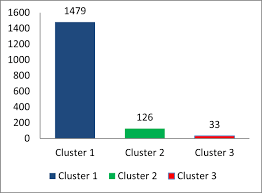

* Cluster 1 means these users has a normal web activities. But cluster 2 has little bit suspicious web activities. Whereas those users who belong to cluster 3 has very suspicious web activities.